# **``Segmentación de Clientes | Marketing``**

La segmentación de clientes es una técnica esencial en el área de marketing que consiste en dividir a los clientes en grupos homogéneos en función de ciertas características, como edad, género, ubicación geográfica, nivel de ingresos y otros factores. Esta segmentación permite a las empresas enfocar sus esfuerzos de marketing en los clientes más propensos a comprar sus productos o servicios, y maximizar así el retorno de la inversión en publicidad y otras actividades de marketing.

Hay muchas razones por las que la segmentación de clientes es importante para el área de marketing. Algunas de ellas incluyen:

1. **Mejora la efectividad de las campañas de marketing**: Al segmentar a los clientes, las empresas pueden enviar mensajes de marketing más relevantes y personalizados a los diferentes grupos, lo que aumenta la probabilidad de que los clientes respondan positivamente a las campañas.
2. **Ayuda a ahorrar dinero**: Al enfocar los esfuerzos de marketing en los clientes más propensos a comprar, las empresas pueden ahorrar dinero al no tener que gastar tanto en publicidad y otras actividades de marketing para grupos de clientes menos propensos a comprar.
3. **Facilita la toma de decisiones**: La segmentación de clientes proporciona a las empresas una mejor comprensión de sus clientes y sus necesidades, lo que facilita la toma de decisiones sobre cómo mejorar los productos y servicios y cómo llegar a los clientes más efectivamente.

**Situación problemática**

Una tienda online en Seatle, Estado Unidos ha contratado nuestros servicios de consultoriía de Data Science. En particular esta tienda muchos datos de los dos últimos años que ha venido recopilando a través de sus redes sociales, los formularios de su pagina web y otro medios de internet que permiten la compra de sus articulos.

**Objetivos Generales:**
1. Realizar campañas de marketing enfocadas a cada segemento específico y/o a cada perfil del cliente dividiendo para ello todos clientes en por lo menos en tres segmentos distintivos entre ellos.

**Objetivos Específicos:**
1. Desarrollar el análisis exploratorio de los datos proporcionados por la empresa.
2. Realizar gráficos interactivos usando la librería Plotly.
3. Implementar la teoría de los autoencoders con Keras y Tensorflow para reducir la dimensión del dataset.
4. Segmentacion de datos (clientes) usando el algoritmo de K-Means y elegir el número óptimo de segmentos basados en el Método del Codo usando sckit-learn.
5. Usar una técnica no supervisada del ACP o PCA en ingles para reducir la dimensión del dataset.
6. Realizar un óptima ingeniería de características en los datos faltantes o nulos.

La segmentación de clientes es una técnica esencial en el área de marketing que permite a las empresas enfocar sus esfuerzos de marketing en los clientes más propensos a comprar y ahorrar dinero al mismo tiempo. También facilita la toma de decisiones y mejora la efectividad de las campañas de marketing.

## **1. Importación de librerías**

1. Leer los job posts. Ver las brechas 
2. Treinta
3. Cual fue tu intensión
4. como llegaste a la data.
5. como fue la lógica, como pensarte el problema, como escogiste la solución,
6. como piensa estratégicamente.
7. A fín el modelo de negocio.
8. Proyectos referenctes al proyecto.
9. 

In [2]:
# Importacion de modulos y librerías

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msn

In [3]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [4]:
# Importacion de modulos y librerías

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msn

# import zipfile
# import cv2

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

from IPython.display import display

from tensorflow.keras import backend as K

from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows', 1000)

## **2. Carga de datos**

Cargamos la data con Pandas y especificamos el ``encoding`` que en este caso específico es ``unicode_escape``

In [6]:
sales = pd.read_csv('./Datasets/sales_data_sample.csv', encoding='unicode_escape')

Nota:
MSRP: Es el precio minorista sugeridop por el fabricante (MSRP) o el precio de etiqueta que representa el precio minorista sugerido de los productos.
El MSRP se utiliza para estandarizar el precios de los productos en varias ubicaciones de las tiendas de la empresa.

In [7]:
sales.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


Observaciones:
La columna STATE no tiene sentido para otras regiones que no sean de Estado Unidos.

## **Tipo de datos / Normalización**

In [8]:
# Verificacion de los tipos de datos del datasets
sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Observación:
* Mayoría de las variables son del tipo de Object y una minoría son enteros

Cambiaremos el tipo de dato ``ORDERDATE`` a un formato de fecha con el método de ``.to_datetime()`` de Pandas.

In [9]:
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])#, format='%m/%d/%Y')

## **Valores nulos**

Verifiquemos la **cantidad de valores faltantes o nulos** por cada columna del DataFrame

In [10]:
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### **Gráfico de matriz de datos faltantes**

Ahora usaremos él modulo ``missingno`` para ver la matriz de distribucion de los valores nulos por cada columna del DataFrame

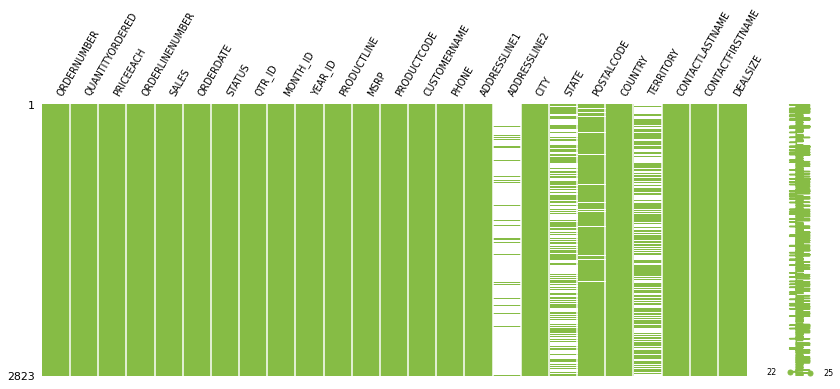

In [11]:
msn.matrix(sales, figsize=(14,5), fontsize=9.5, label_rotation=60, color=(0.52941176, 0.7372549 , 0.27058824))
plt.show()

Las variables ``ADDRESSLINE2``, `` STATE``, ``TERRITORY`` y ``POSTALCODE`` tienen valores nulos.

### **Mapa de calor de datos faltantes**

A continuación, hemos trazado un mapa de calor que muestra la correlación de nulidad entre varias columnas del conjunto de datos de ventas. La mayoría de las entradas están vacías en el mapa de calor porque el conjunto de datos de ubicaciones de ventas tiene menos valores faltantes.

La correlación de nulidad oscila entre -1 y 1 .

``-1``: La **correlación negativa exacta** representa que si el valor de una variable está **presente**, el valor de otras variables está definitivamente **ausente** .

``0``: **Sin correlación** representa que los valores **presentes o ausentes** de las variables **no tienen ningún efecto entre sí.**

``1``: La **correlación positiva exacta** representa que si el valor de una variable está **presente** , entonces el valor de la otra definitivamente está **presente**.

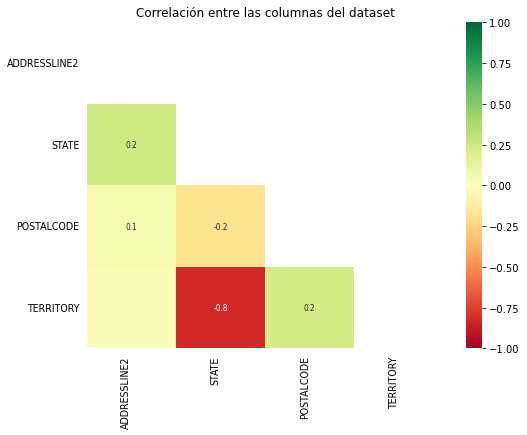

In [12]:
msn.heatmap(sales, cmap="RdYlGn", figsize=(8,6), fontsize=9.5, label_rotation=90)
plt.title('Correlación entre las columnas del dataset')
plt.show()

Podemos inferir que la nulidad de la variable Estado es directamente proporcional a la presencia de un valor en la columna Territorio, es decir que si un registro no tiene un valor para la variable ``Estado (STATE)`` muy probablemente tiene valor en la variable ``Territorio (TERRITORY)``. Esto ocurre porque solo en Estados Unidos y en otros pocos países existen ``Estados (STATE)`` y mientras que en muchos otros países la población se organiza en ``Territorios (TERRITORY)``. De la misma forma ocurre entre las variables ``Etado (STATE)`` y ``Código Postal (POSTALCODE)`` aunque la correlacion es débil de -0.2.

Los valores nulos o no nulos de las variables ``Direccion de envio 2 (ADDRESLINE2)`` y ``Territorio (TERRITORY)`` no tienen efecto entre sí.

In [13]:
# null_index = sales.isnull().sum().index
# null_values = sales.isnull().sum().values
# px.bar(sales, x=null_index, y=null_values, figsi)

Pudimos observar que existen muchos valores nulos en ``ADDRESSLINE2``, `` STATE``, ``TERRITORY`` y ``POSTALCODE`` por lo que procederemos a eliminar.
``COUNTRY`` es la variable que representaría la información geográfica del pedido.
Eliminaremos tambien columnas que no nos interesan o que no aportan a la segmentación de clientes, tales como 'ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME' y 'ORDERNUMBER'

In [14]:
cols_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales = sales.drop(columns=cols_drop, axis=1)

In [15]:
sales.head(7)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
5,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
6,29,86.13,9,2497.77,2003-11-11,Shipped,4,11,2003,Motorcycles,95,S10_1678,France,Small


## **Análisis Exploratorio de Datos y Limpieza**

**¿A cuántos países se venden nuestros productos?**<br>
**¿Cuánto productos diferentes fueron vendidos y a través de qué lineas de producto?**


In [16]:
unique_countries = sales['COUNTRY'].unique()
unique_products = sales['PRODUCTCODE'].unique()
unique_product_line = sales['PRODUCTLINE'].unique()

print(f'Total de Países diferentes: {len(unique_countries)}')
print(f'Total de Productos diferentes: {len(unique_products)}')
print(f'Total de Líneas de Producto diferentes: {len(unique_product_line)}')

# Otra forma de saber valores únicos de todo el dataset
# sales.nunique()

Total de Países diferentes: 19
Total de Productos diferentes: 109
Total de Líneas de Producto diferentes: 7


* Tenemos 109 productos diferentes que son vendidos por 7 lineas de producto diferentes
* Abastecimiento del servicio a 19 países y 9 estados diferentes.

**Distribución de la cantidad de órdenes de artículos por cada país**

In [17]:
df_country = sales.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values()
# df_producto = sales.groupby('COUNTRY')['QUANTITYORDERED'].sum()
# sns.barplot(df_country, x=df_country.index, y=df_country.values)

fig = plt.Figure(figsize = (12, 6))
fig = px.bar(
            x = df_country.index,
            y = df_country,
            color = df_country.index,
            height = 600,
            labels={
                'x': 'Países',
                'y': 'Cantidad de ordenes (miles de artículos)'
            }
            )
fig.update_layout(
    title={
        'text': 'Cantidad de órdenes de articulos por cada país.',
        # 'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':22,
        'font_color':'blue'})
fig.show()

A partir de la gráfica anterior podemos resaltar:
- Estados Unidos definitivamente es el país con mayor demanda de órdenes de artículos.
- El volumen de de demanda de los cuatros grandes mercados con mayor demanda descantando Estados Unidos son España,Francia, Australia y Reino Unido que todos juntos ocupan el mismo volumen de demanda que Estados Unidos, aproximadamente.

**¿Cuántos valores de estado de pedido unicos tenemos?**

In [18]:
# Estados únicos
unique_states = sales['COUNTRY'].value_counts().index
print(f'Estados únicos: {unique_states}')

Estados únicos: Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')


Para verificar cómo se distribuye la cantidad de pedidos de articulos por cada país y estado realizaremos una gráfica de barras para analizar sus peculiaridades.

In [19]:
def barplot_visualization(col_name, title, x_label, y_label):
    fig = plt.Figure(figsize=(18,8))
    fig = px.bar(
                x = sales[col_name].value_counts().index,
                y = sales[col_name].value_counts().values,
                color = sales[col_name].value_counts().index,
                height=500,
                width=800,
                labels={
                    'x': x_label,
                    'y': y_label
                }
                )
    fig.update_layout(
        title={
            'text': title,
            # 'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font_size':18,
            'font_color':'blue'})
    
    fig.show()

**Distribución de cantidad de pedidos por país**

In [20]:
barplot_visualization('COUNTRY', 'Distribución de cantidad de pedidos por país','País','Cantidad de pedidos')

**Distribución de la cantidad de pedidos de acuerdo al estado del pedido**

In [21]:
# barplot_visualization('STATUS')
barplot_visualization('STATUS', 'Distribución de la cantidad de pedidos de acuerdo al estado del pedido','Estado del pedido','Cantidad de pedidos')

Esta variable posee una distribución de datos desbalanceado. La mayoría de los artículos son enviados y son tienen una representacion muy minoritaria los Cancelados, En proceos, en espera, cuestionado, resuelto. Por esta razón tomaremos la decision de eliminar.

In [22]:
sales = sales.drop(columns=['STATUS'], axis=1)

**Distribución de la cantidad de pedidos de acuerdo a la linea de producto**

In [23]:
# Linea de Producto
barplot_visualization('PRODUCTLINE', 'Distribución de la cantidad de pedidos de acuerdo a la linea de producto','Linea de producto','Cantidad de pedidos')


Las dos principales medios de envio (``PRODUCTLINE``) que usamos para enviar los productos y articulos se realizan a través de autos clásicos (``Classic Cars``) y conches antiguos (``Vintage Cars``).
Tenemos a Motocicletas(``Motorcycles``), Aviones (``Planes``) Y camiones y autobuses (``Trucks and Buses``) que presentan una recurrencia similar para el envió de los articulos.
Se puede decir tambien que el medio menos usado son los trenes (``Trains``)

**Distribución de la cantidad de pedidos de acuerdo al tamaño de la operación**

In [24]:
# Tamano del producto de envío
barplot_visualization('DEALSIZE', 'Distribución de la cantidad de pedidos de acuerdo al tamaño de la operación','Tamaño de la operación','Cantidad de pedidos')


A partir de la grafica anterior, es evidente que la empresa realiza envios mayoritariamente de productos de tamaño mediano y pequeño. Los productos de tamaño grande tienen tienen presencia escasa en los envíos porque representan un pequeño porcentaje del total de articulos a enviar.

## **Ingeniería de Características**

### **Preprocesamiento de Datos**

#### **Preprocesamiento de Datos | Conversion de Variables categóricas a Numeéricas**

Debemos recordar que la entrada de datos para trabajar con los modelos de machine learning o deep learning debe ser de tipo ``integer``, ``float`` o ``decimal``, es decir, todas las variables deben ser numéricas y aquellas que son categóricas se deben discretizar o convertir al tipo numérico de acuerdo a la naturaleza del dato.

In [25]:
# Realizamos una copia profunda de nuestro dataset para trabajar el preprocesamiento.
sales_df = sales.copy(deep=True)

In [26]:
sales_df.dtypes

QUANTITYORDERED             int64
PRICEEACH                 float64
ORDERLINENUMBER             int64
SALES                     float64
ORDERDATE          datetime64[ns]
QTR_ID                      int64
MONTH_ID                    int64
YEAR_ID                     int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
COUNTRY                    object
DEALSIZE                   object
dtype: object

Las variables ``PRODUCTLINE``, ``COUNTRY``, ``DEALSIZE`` y ``PRODUCTCODE`` son del tipo categórico que nos tocará transformarlos a numérico. Para las tres primeras variables usaremos variables **dummy** que existe en Python usando el método ``.get_dummies()`` de la librería Pandas

In [27]:
# Función para agregar variables ficticias para reemplazar categóricas
def cat_to_dummy(col_name):
    dummy = pd.get_dummies(sales_df[col_name])
    sales_df.drop(columns=col_name, axis=1, inplace=True)
    return pd.concat([sales_df, dummy], axis=1)

In [28]:
# Transformando las variables COUNTRY, PRODUCTLINE y DEALSIZE a numérico
sales_df = cat_to_dummy('COUNTRY')
sales_df = cat_to_dummy('PRODUCTLINE')
sales_df = cat_to_dummy('DEALSIZE')

Aún nos queda una variable categórica que es el Código de Producto (``PRODUCTCODE``)

In [29]:
sales_df['PRODUCTCODE'].unique().shape 

(109,)

Hay 109 categorías únicas como código de productos lo que implica la existencia de 109 productos únicos que se vende. Para convertir esta variable a numérica usando dummy resultaría incrementando 109 columnas adicionales lo cual sería infeciente al momento de procesar. Por esta razón, usaremos de la librería Pandas el objeto ``.Categorical()`` y especificamente su atributo ``.code`` para discretizar en la misma columna asignando valores entre 0 y 109 menos 1 a cada ``PRODUCTCODE`` diferente.

In [30]:
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [31]:
sales_df.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [32]:
sales_df_group = sales_df.groupby(by=['ORDERDATE']).sum()
sales_df_group.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,1,1


**¿Cuádo se alcanza el punto máximo en las ventas?**

In [33]:
fig = plt.Figure(figsize=(120,3))
fig = px.line(
    x=sales_df_group.index,
    y=sales_df_group['SALES'].values,
    # color = blue,
    labels = {
        'x': 'Fecha',
        'y': 'Ventas diarias totales ($)',
    }
)
fig.update_layout(
    title={
        'text':'Ventas totales en dolares por día',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size': 22,
        'font_color': 'black'
    }
)

fig.show()

La mayor cantidad de ventas se registran alrededor del mes de Noviembre e inicios de Diciembre tanto en el 2003 y 2004, de forma específica el 14 de Noviembre se presenta el mayor volumen de venta durante el 2003 y el 24 de Noviembre del 2004, estas fechas coinciden y se desarrollan dentro del mes del **Black Friday**; muy probablemente esto sea la razón de este maximo en las ventas diarias. Por otro lado, durante dos ventanas temporales se registra un pico de ventas durante el 2004, especificamente durante mediados de Agosto e incios de Septiembre del 2004, y, Febrero e inicios de Marzo del 2005 que puede tratarse por alguna festividad favorable para las ventas de la empresa.

In [34]:
sales_df_group.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2


Recordemos que nuestro problema es realizar una Segmentación de Cliente, es decir, desde un punto de vista de Modelado con Machine Learning o Deep Learning es un problema de clusterización (agrupamiento) por esta razón no será de nuestro interés manipular las variables dependiendo de la variable fecha.

In [35]:
# Eliminamos la variable Fecha
sales_df = sales_df.drop('ORDERDATE', axis=1)
sales_df.shape

(2823, 38)

**Selección de variables**

Si tenemos variables altamente correlacionados podemos prescindir de uno y utilizar el otro. Conceptualmente sabemos que la columna del mes y el trimestre están relaiconados porque porque existe un sentido de pertencia que los une, al final un trimestre es la agrupacion de tres mese consecutivos por tanto es de esperarse una alta correlación de estos campos. Pero no sabemos si las demás variables guardan una alta relación entre sí.

Para cumplir con este propósito realizaremos una matriz de correlación cnsiderando las columnas o variables: ``QUANTITYORDERED``, ``PRICEEACH``,``ORDERLINENUMBER``, ``SALES``, ``QTR_ID``, ``MONTH_ID``, ``YEAR_ID``, ``MSRP`` y ``PRODUCTCODE`` ya que las demás columnas representan dos unicas variables extendidas a través de columnas usando **dummies**.

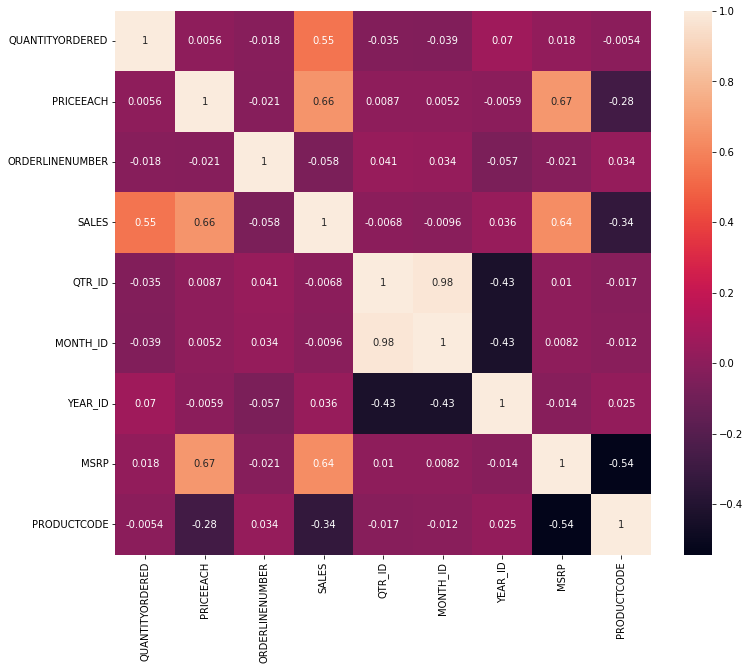

In [36]:
# sales_df.iloc[:,:10].corr()
corr_matrix = sales_df.iloc[:,:9].corr()
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=True
    )
plt.show()

- Las variables ``QTR_ID`` y ``MONTH_ID`` como ya habíamos intuido por concepto anteriormente, corroboramos que guardan una **alta correlación de 0.98** entre sí. Esto nos llevará a eliminar la columna ``QTR_ID`` y quedarnos unicamente con el ``MONTH_ID`` porque tiene datos más granulares que podemos sacarle mayor provecho y mejorar nuestro modelo.
- La variable precio de venta sugerido por el fabricante (``MSRP``) guarda una **considerable correlacion positiva (0.64)** con la variable ventas (``SALES``), y con la variable precio unitario (``PRICEEACH``) tambien guarda una **correlacion moderadamente alta de 0.67**. Sin embargo, las correlaciones no son tan cercanas a 1 como fue con ``QTR_ID`` y ``MONTH_ID``, por tanto, las variables ``MSRP``, ``SALES`` y ``PRICEEACH`` no pueden prescindir pese a que los dos últimos muestran cosiderable correlacion con el primero.

In [37]:
sales_df = sales_df.drop(['QTR_ID'], axis=1)
sales_df.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.0,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.9,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


* Veamos las distribuciones de las variables
  - Displot muestra el Histograma, kde plot(estimacion de la densidad) y Rog plot (diagrama de alfombra)
  - HIstograma: es una visualizacion gráfica de barras cuya altura depende de la cantidad de datos por cada agrupación numerica en rangos que compone una barra.
  - Kernel Density Estimation o grafico de densidad: estimacion de la funcion densidad que se usa para visualizar la densidad de probabilidad de una variable continua.
  - Gráfica de alfombra: gráfico de datos para una variable cuantitativa, que se muestra que se muestra como marcas a lo largo de un eje (gráfico de dispersión unidimensional)

In [38]:
import plotly.figure_factory as ff

plt.figure(figsize=(10,10))

for col in range(8):
    if sales_df.columns[col] != 'ORDERLINENUMBER':
        col_name = sales_df.columns[col]
        df = sales_df[col_name].apply(lambda x: float(x))
        fig = ff.create_distplot([df], ['displot'])
        fig.update_layout(
            # title_text = col_name
            title={
                'text': col_name,
                # 'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'font_size':22,
                'font_color':'blue'}
            )
        fig.show()

<Figure size 720x720 with 0 Axes>

- Respecto a la distribucion de cantidad de pedidos podemos aseverar que es muy raro encontrar menos de 20 y más de 55 pedidos, generalmente gran mayoría de pedidos se realizan son de entre 20 y 55 artículos.
- Existe una alta probabilidad de encontrar productos que tienen un precio unitario alrededor de los 100 dólares (precio máximo del conjunto de productos) pese a que existen productos desde 26.88 dólares.
- Existe una mayor concetracion de ventas de entre 1200 a 6500 dólares y no podemos descartar las ventas mayores a $ 6500 que muestran menos observaciones cada vez mayor se hace el valor de las ventas hasta llegar a la máxima cantidad facturada por ventas de 14082.8 dólares.
- Se han registrado mayor cantidad de pedidos entres los meses de Octubre y Diciembre, y esto seguramente es un efecto de la semana de Black Friday como ya comentamos anteriormente.
- La distribucion de los años no tiene sentido evaluar porque es una variable discreta.
- El precio sugerido por el fabricante no sigue una distribución canónica.
- Analizando la distribucion del código del producto (``PRODUCTCODE``) podemos decir que se vendieron todos por igual y no existen gran disparidad salvo el articulo con ``PRODUCTCODE`` 39 es el más vendido.

**Visualización de las correlacion entre las variables**

Para comprender mejor la relación la relacion entre variables veamos una **matriz de dispersión** *(similar al pairplot de seaborn)* usando como campo de color el ``MONTH_ID``.

In [39]:
plt.figure(figsize=(15,15))

fig = px.scatter_matrix(
    sales_df,
    dimensions=sales_df.columns[:8],
    color='MONTH_ID'
)

fig.update_layout(
    title={
        'text':'Datos de Ventas',
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top',
        'font_size':22,
        'font_color':'blue'
        },
    width=1200,
    height=1200,
)
fig.show()

<Figure size 1080x1080 with 0 Axes>

Analisis del gráfico:
- Existe una tendencia entre ``QUANTITYORDERED`` y ``SALES`` que sigue una relacion exponecial, a medida que mayor cantidad de ordenes se realizar las ventas se incrementan de forma exponencial.
- Existe una tendencia entre ``PRICEEACH`` y ``MSRP``.
- Existe una tendencia entre ``PRICEEACH`` y ``SALES``.

<!-- - Existe una tendencia entre ``MSRP`` y ``PRODUCTCODE``. -->


## **Implementación de Modelos de Clusterización K-Means**

K-means es un algortimo no supervisado (clustering) que funciona agrupando obsevaciones con valores de atributos similares al medir la distancia euclidiana entre puntos.

Pasos para implementar el algortimo:

1. Elegir el número de clústers *K*.
2. Seleccionar *k* puntos aleatorios que serán los centroides de cada cluster.
3. Asignar cada punto del dataset al centroide más cercano, esto permitirá un número *k* de clusters con los puntos cercanos.
4. Calcular un nuevo centroide para cada cluster.
5. Reasignar cada punto del conjunto de datos al nuevo centroide más cercano.
6. Repetir desde el punto cuatro en adelante hasta conseguir las métricas que buscamos optimizar.

**¿Como seleccionaremos el número óptimo de Clusters (k))?**

Sabemos que el número de clusters (k) es un hiperparámetro del algoritmo K-Means. Para conseguir el número optimo a priori usaremos el Método de Codo que consiste en calcular la **suma de los cuadrados intra-clusters** (Within Cluster Sum of Square - WCSS), esta medida aproxima como de cerca son las distancias de los puntos a los centros del cluster asigandos:

<!-- ![](./img/fig_within_cluster_sum_of_squares.png) -->
<!-- ![](./img/within_cluster_sum_of_squares.png) -->
![](./img/fig_wcss.png)

**Método de codo**

El método de codo es un método heurístico de interpretación y validación de coherencia dentro del análisis de conglomerados diseñado para seleccionar el número optimo de clusters (*k*) en un conjunto de datos.

Si el gráfico de líneas se parece a un brazo, entonces valor óptimo es el punto a apartir del cual no se presenta mayor disminución de la suma suma de los cuadrados intra-clusters (WCSS).

**Escalado de datos**

A través de las Exploración de Datos pudimos observar que los datos tienen una dispersión muy alta entre cada variable y otra, es decir,  se tienen valores muy altos y otros muy bajos expecialmente en la variable Ventas (``SALES``) y valores de la variables Dummy, respectivamente. Por este motivo realizaremos un proceso de rescalado basado en ``StanderScaler()``, ``MinMaxScaler()`` y ``RobustScaler()``.

Recursos para revisar: https://medium.com/@syedar.sohail/outlier-handling-using-robust-scaler-a-python-tutorial-613d174b58eb

In [40]:
sales_df.shape

(2823, 37)

In [41]:
# Escalamos los datos con StanderScaler()
std_scaler = StandardScaler()
sales_df_std_scaled = std_scaler.fit_transform(sales_df)

# Escalamos los datos con MinMaxScaler()
mm_scaler = MinMaxScaler()
sales_df_mm_scaled = mm_scaler.fit_transform(sales_df)

# Escalamos los datos con RobustScaler()
robust_scaler = RobustScaler()
sales_df_robust_scaled = robust_scaler.fit_transform(sales_df)

# Dimensiones de las listas escaladas. NO varian las dimensiones
sales_df_std_scaled.shape, sales_df_mm_scaled.shape, sales_df_robust_scaled.shape

((2823, 37), (2823, 37), (2823, 37))

In [42]:
scalers = {
    'standard': sales_df_mm_scaled,
    'minmax': sales_df_mm_scaled,
    'robust': sales_df_robust_scaled
}

> Nota: la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano, esto se obtiene con el método ``.inertia_`` entrenamiento del algoritmo K-Means

In [43]:
from itertools import cycle

def plot_wscc(list_scalers, num_k_optimized):
    
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    
    # lista_y = cycle([5690.427, 5690.427, 11.68018*1000])
    lista_y = []
    color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for j in range(len(list_scalers)):

        scores = []

        for i in range(1,21):
            kmeans = KMeans(n_clusters=i)
            kmeans.fit(list_scalers[list(scalers.keys())[j]])
            scores.append(kmeans.inertia_) # la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano
            if i == num_k_optimized:
                lista_y.append(kmeans.inertia_)

        fig = plt.Figure(figsize = (12, 5))
        fig = px.line(
                    x=np.arange(1,21),
                    y=np.array(scores),
                    # color = next(color_list),
                    # color_discrete_sequence = px.colors.qualitative.G10,
                    height = 600,
                    markers=True,
                    labels={
                        'x': 'N° de Clusters',
                        'y': 'WCSS'
                    }
                    )
        color_font_line = next(color_cycle)
        fig.update_traces(line_color=color_font_line)
        # Configuración del diseño de elementos de la figura
        fig.update_layout(
            title={
                'text': f'Encontrar el número correcto de clusters con {list(scalers.keys())[j]} escaler',
                # 'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'font_size': 22,
                'font_color': color_font_line}
            )
        # Anotación
        fig.add_annotation(
                text="Número óptimo de clusters",
                x=num_k_optimized,
                y=lista_y[j],
                arrowhead=1,
                showarrow=True,
            )
        fig.show()

In [44]:
plot_wscc(scalers,5)

Podemos observar que a apartir del quinto numero de cluster o grupo la curva parece estar formando el codO. Sin embargo, es importante considerar que la curva cambiará cada que ejecutemos nuevamente la celda o el código.

In [45]:
# Aplicando el Algoritmo de K-Means
kmeans = KMeans(5)
kmeans.fit(sales_df_std_scaled)
labels = kmeans.labels_
# Etiquetas del clúster asociados a cada observación
labels
# sales_df_std_scaled
# sales_df_mm_scaled
# sales_df_robust_scaled

array([2, 2, 4, ..., 4, 2, 4])

Podemos observar que las primerzas 2 observaciones pertencen al cluster 4 y la tercera al cluster 2 y así sucesivamente.

In [46]:
# Dimension del dataframe formado por los baricentros de los clusters
kmeans.cluster_centers_.shape

(5, 37)

Ahora vamos a generar un dataframe con los centroides de los cinco clusters y recordemos que estos resultados están escalados. Así mismo, realizaremos una tranformación inversa para poder volver a los valores originales del dataset a través del patrón del algoritmo del metodo de escalado para tener un mejor entendimiento de lo registros que ocupan los centroides en la escala original.

In [47]:
# Dataframe de centroides de los cinco clusters con datos escalados usando el método Standard Scaler
cc_std = pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales_df.columns])
# Dataframe de centroides de los cinco clusters con datos transformados al original del escalado con Standard Scaler
cc_std_inv_transf = pd.DataFrame(data=std_scaler.inverse_transform(cc_std), columns=[sales_df.columns])

In [48]:
cc_std

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,-0.108756,-0.118498,0.107642,-0.004181,0.071653,0.023985,0.094193,0.023250,0.005118,0.010166,-0.029737,-0.015199,-0.039435,-0.052984,-0.105371,-0.116045,0.108611,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.912100
1,-0.067850,-0.128772,0.202021,-0.295849,-0.076458,0.133048,-0.335844,0.846756,0.078803,-0.017914,-0.108756,0.059274,-0.105029,0.046333,-0.018406,0.035811,0.105737,0.333700,0.267740,0.042748,0.046012,-0.169676,-0.058556,-0.095188,-0.105371,0.000049,-0.117671,-0.721812,-0.364452,2.868012,-0.300637,-0.167454,-0.345470,-0.523371,-0.242672,-0.123398,0.235597
2,-0.448014,-0.790646,0.025660,-0.828061,0.026092,-0.041053,-0.636719,0.225370,0.021697,-0.027704,0.045447,0.000422,0.004763,-0.017591,0.018173,-0.017914,-0.001903,0.016578,-0.027421,-0.030710,-0.009660,0.036898,0.012511,-0.012620,-0.070029,0.010897,-0.008148,-0.116425,0.082044,-0.348674,0.123505,0.115200,0.009566,0.198331,-0.242672,-0.980703,1.096370
3,0.067246,0.650501,0.007795,0.510761,0.030003,-0.037426,0.820576,-0.551648,-0.047950,0.117899,-0.042183,-0.032914,0.042690,0.017959,-0.069283,0.118678,-0.004010,-0.131192,-0.057165,0.064574,0.090855,-0.017824,-0.003956,-0.003649,0.358101,0.003949,-0.040390,1.381632,-0.364452,-0.342919,-0.300637,-0.167454,-0.345470,-0.523371,-0.242672,0.919478,-0.811497
4,0.376022,0.560160,-0.069965,0.408037,-0.012120,0.006743,0.147127,-0.066650,-0.009130,-0.051392,0.032014,0.026298,-0.020712,-0.005365,0.018096,-0.084155,-0.057176,-0.063859,-0.024463,-0.023261,-0.067615,0.030486,0.016548,0.071594,-0.105371,0.005727,0.067359,-0.721812,0.302529,-0.339824,0.233173,0.052107,0.434465,0.350481,-0.242672,1.019676,-0.912100


In [49]:
cc_std_inv_transf

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,1.734723e-18,0.006369,0.038217,0.031847,0.133758,0.025478,0.012739,0.044586,0.019108,0.031847,0.006369,2.547771e-02,0.108280,0.012739,-5.204170e-18,0.025478,0.407643,6.178344e-01,1.210191e-01,5.732484e-02,-4.163336e-17,6.369427e-03,4.458599e-02,1.528662e-01,1.000000e+00,-2.775558e-16,-1.110223e-16
1,34.431973,81.061122,7.319728,3009.072245,6.812925,2003.908163,87.221088,80.513605,0.085034,0.017007,-8.673617e-18,0.034014,0.006803,0.040816,0.105442,0.027211,0.013605,0.105442,0.054422,0.037415,0.013605,-3.469447e-18,0.102041,0.006803,1.214306e-17,0.051020,0.299320,2.220446e-16,8.326673e-17,1.000000e+00,-2.775558e-17,-1.040834e-17,8.326673e-17,2.498002e-16,-6.938894e-18,4.285714e-01,5.714286e-01
2,30.729282,67.710654,6.574586,2028.982293,7.187845,2003.786372,75.131676,60.890424,0.070902,0.015654,1.657459e-02,0.024862,0.023020,0.029466,0.116943,0.019337,0.005525,0.043278,0.014733,0.024862,0.008287,3.406998e-02,0.125230,0.018416,3.683241e-03,0.053407,0.351750,2.872928e-01,1.436464e-01,4.163336e-17,1.169429e-01,4.604052e-02,1.095764e-01,2.965009e-01,-1.387779e-16,-7.771561e-16,1.000000e+00
3,35.747764,96.779606,6.499106,4494.474544,7.202147,2003.788909,133.686941,36.352415,0.053667,0.035778,7.155635e-03,0.019678,0.028623,0.035778,0.089445,0.039356,0.005367,0.014311,0.010733,0.041145,0.017889,2.504472e-02,0.119857,0.019678,4.830054e-02,0.051878,0.336315,9.982111e-01,0.000000e+00,1.788909e-03,-9.714451e-17,-4.510281e-17,1.110223e-16,4.163336e-16,-9.020562e-17,9.499106e-01,5.008945e-02
4,38.755158,94.957359,6.170564,4305.304415,7.048143,2003.819807,106.627235,51.668501,0.063274,0.012380,1.513067e-02,0.028886,0.019257,0.031637,0.116919,0.009629,0.001376,0.027510,0.015131,0.026135,0.002751,3.301238e-02,0.126547,0.030261,2.602085e-17,0.052270,0.387895,4.996004e-16,2.145805e-01,2.751032e-03,1.471802e-01,3.576341e-02,2.407153e-01,3.590096e-01,-6.938894e-17,1.000000e+00,8.326673e-16


- **Cluster índice 0:** (con QUANTITYORDERED más alto).
  - Este grupo representa a los clientes que realizan mayor cantidad centrada de pedidos o compras  (entorno a 47 pedidos).
  - Compran articulos en todos lo rangos de precios inclinándose hacia artículos de precios más altos de 99 dólares.
  - Corresponden a ventan totales más altas alrededor de 8298 dólares.
  - Se mantienen activas durante todo el año con sus compras.
  - Son usuarios o clientes que compran productos con alta MSRP alrededor de 158 dólares.
  - En suma, podemos decir que este es el grupo de los usuarios **high rollers** los que están dispuestos a comprar nuestros productos de mayor costo, están en las posibilidades y tienen recurrencia todo el año.
- **Cluster índice 1:**
  - Es el grupo que representa a los clientes que están activos únicamente durante las vacaciones.
  - Compran en menor cantidad alrededor de 81 artículos.
  - Pero, tienen a comprar artículos de precio promedio alredor de 81
  - Corresponden a ventas totales muy bajas alredor de los 2991 dóalres.
  - Compran productos con MSRP un tanto bajos alrededor de 92 dólares.
- **Cluster índice 2:**
  - Representa el grupo de clientes que compran articulos en cantidades alrededor de 36.
  - Tienden a comprar artículos de alto precio alrededor de 95.
  - Son el segundo grupo de clientes que generan alto valor de venta alrededor de 4404 dólares.
  - El segundo grupo de clientes que generan mayor valor de ventas de alrededor de 4404 dólares.
  - Compran productos con el segundo MSRP más alto alrededor de 115.
  - En suma, es el segundo grupo de clientes que tienen alto poder adquistivo y el equipo de Marketing debería considerar realizar ofertas quizá no tan agresivas como para el grupo o cluster 0 pero si muy intersantes ya que estan realizando comprar en moderada cantidad pero aun un precio aúnsustanciamente elevado que como lo hacen del cluster 0.
- **Cluster índice 3:**
  - Este grupo de clientes compran articulos en cantidad variable alrededor de 36 artículos.
  - Tienden a comprar artículos de precio unitario en promedio de 82 dólares.
  - Las ventas que generan son igual de bajas (alrededor de 3615 dólares), pero un poco mejores que los que generaría el cluster 1.
  - Compran productos de MSRP que está alredor de 97 dólares que es tambien mejor el del grupo o cluster 1.
- **Cluster índice 4:** (con QUANTITYORDERED más bajo)
  - Este grupo representa a los clientes que compran artículos en cantidades bajas alrededor de 30.
  - Suelen comprar artículos de muy bajo precio alrededor de 68.
  - Las ventas que generan en la compañía son alrededor de 2056, también el más bajo en comparación con los otros grupos.
  - Son extremadamente activos durante durante la temporada Navideña.
  - Compran productos con el menor MSRP que esta alrededor de 77.
  - Este es el grupo que compra menos productos y por tanto genera menos ventas. Sin embargo, el equipo de Marketing podría ofrecer ofertas como los de Back Friday o descuentos porque su motivación parece ser el aprovechar los precios mas bajos, gastar poco dinero.

Ahora bien, si nos llegara un nuevo cliente y queremos catalogar o clasificar dentro de los 5 grupos/clusters que hemos modelado podemos hacerlo directamente usando el método ``.fit_predict()`` del algoritmo de K-Means.

In [50]:
y_kmeans = kmeans.fit_predict(sales_df_std_scaled)
y_kmeans

array([4, 4, 1, ..., 0, 0, 0])

Agregamos una etiqueta (qúe cluster) correspondiente a cada punto de los datos.

In [51]:
sale_df_std_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis=1)
sale_df_std_cluster.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4
3,45,83.26,6,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,4
4,49,100.00,14,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,4


In [52]:
# Verifiquemos los tipos de datos de las variables
# sale_df_std_cluster.dtypes
sale_df_std_cluster['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

In [53]:
sale_df_std_cluster.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,4
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,4


In [54]:
def to_float(column_name):
    sale_df_std_cluster[column_name] = sales_df[column_name].apply(lambda x: float(x))
    return sale_df_std_cluster

In [55]:
sale_df_std_cluster = to_float('ORDERLINENUMBER')
sale_df_std_cluster.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2.0,2871.0,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5.0,2765.9,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2


### **Representcación de un histograma para cada característica según el cluster al que pertenece**

Ahora entendamos cada variable para cada uno de los clusters para ello realizaremos un bucle para graficar la distribución de cada variable en cada cluster. El código recorrerá las primeras ocho columnas de un dataframe de Python llamado ``sales_df`` y luego usará la función hist de ``matplotlib`` para generar un histograma para cada columna en cada uno de los cinco clusters diferentes en un dataframe llamado ``sale_df_std_cluster. La función hist de ``matplotlib`` generará un gráfico que mostrará cuántas veces aparecerá cada valor en un conjunto de datos. En este caso, se generará un histograma para cada columna en cada cluster.

La línea for i in ``sales_df.columns[:8]`` iterará sobre las primeras ocho columnas del dataframe ``sales_df``. Dentro de este bucle, la línea ``for j in range(5)`` iterará sobre los cinco clusters diferentes en ``sale_df_std_cluster``. La línea ``cluster = sale_df_std_cluster[sale_df_std_cluster['cluster']==j]`` seleccionará los datos del cluster actual del dataframe ``sale_df_std_cluster``. Luego, la línea ``cluster[i].hist()`` generará un histograma para la columna actual del dataframe cluster, y la línea ``plt.title(f'{i}\nCluster {j}')`` establecerá el título del histograma en el nombre de la columna y el número del cluster actual.

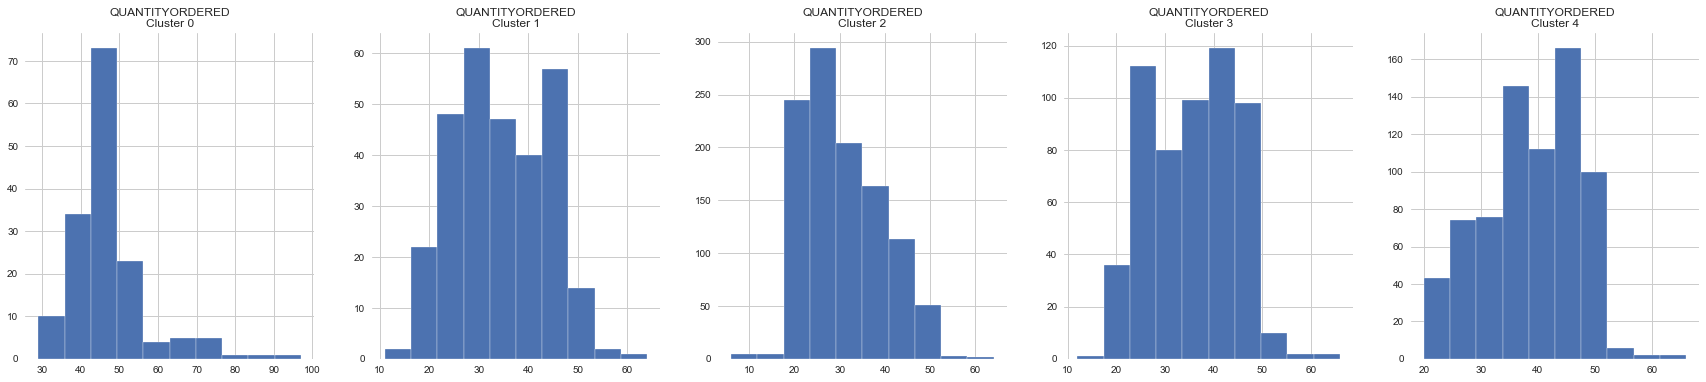

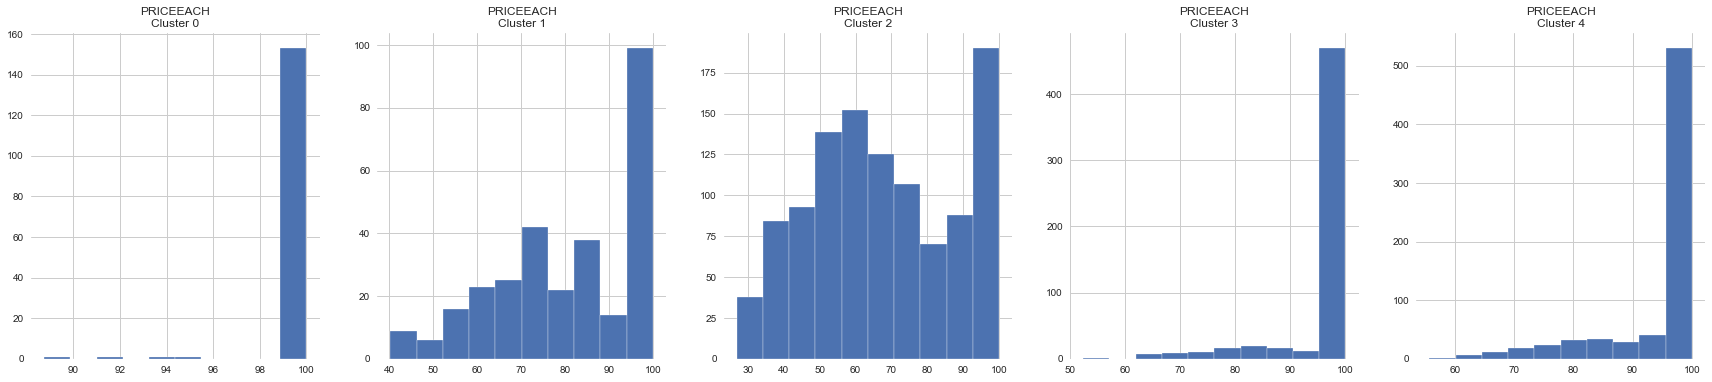

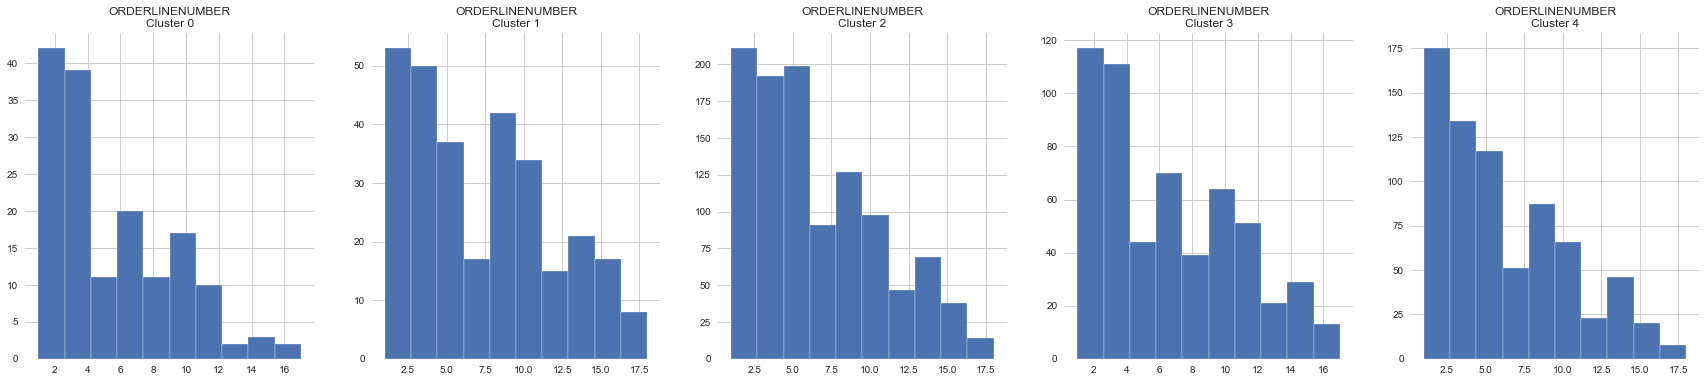

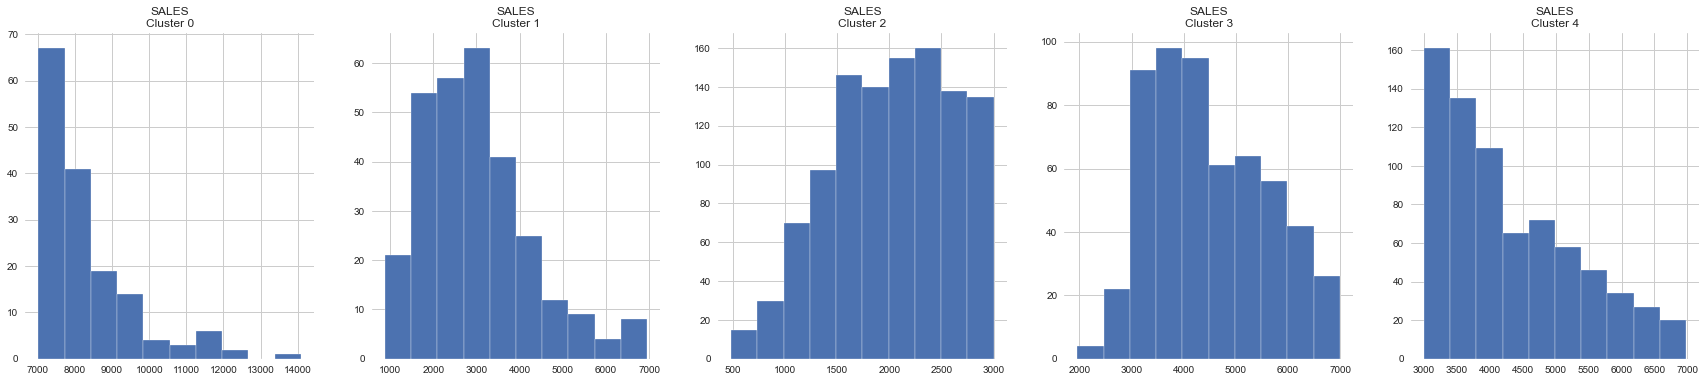

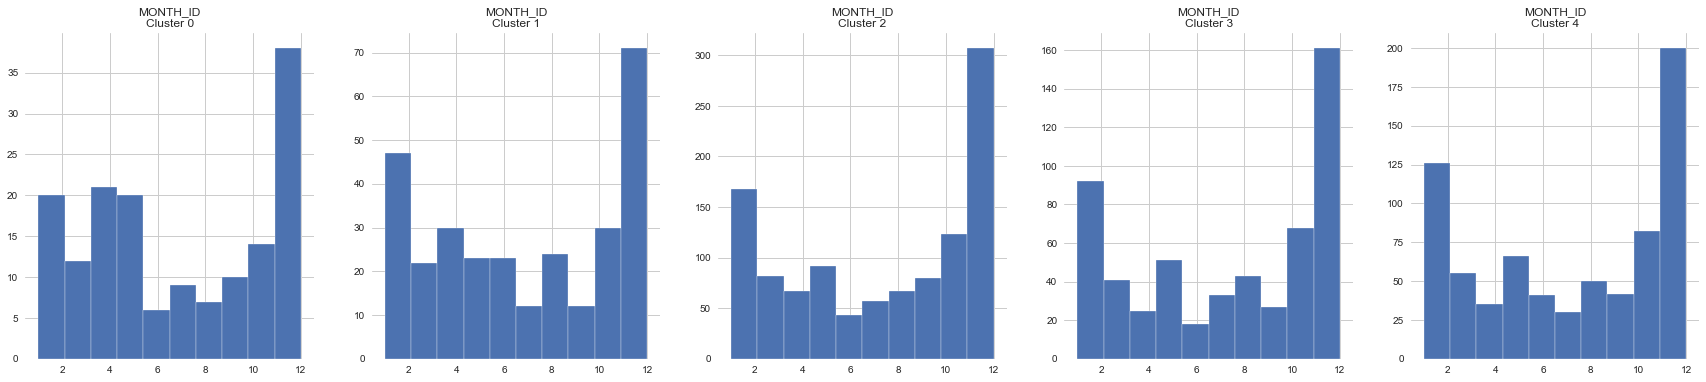

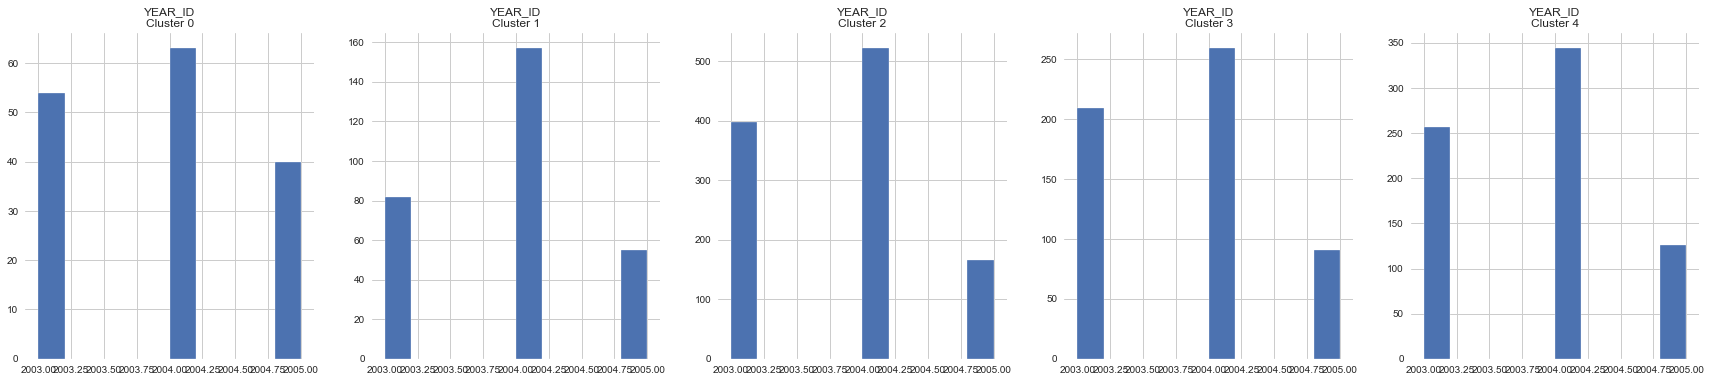

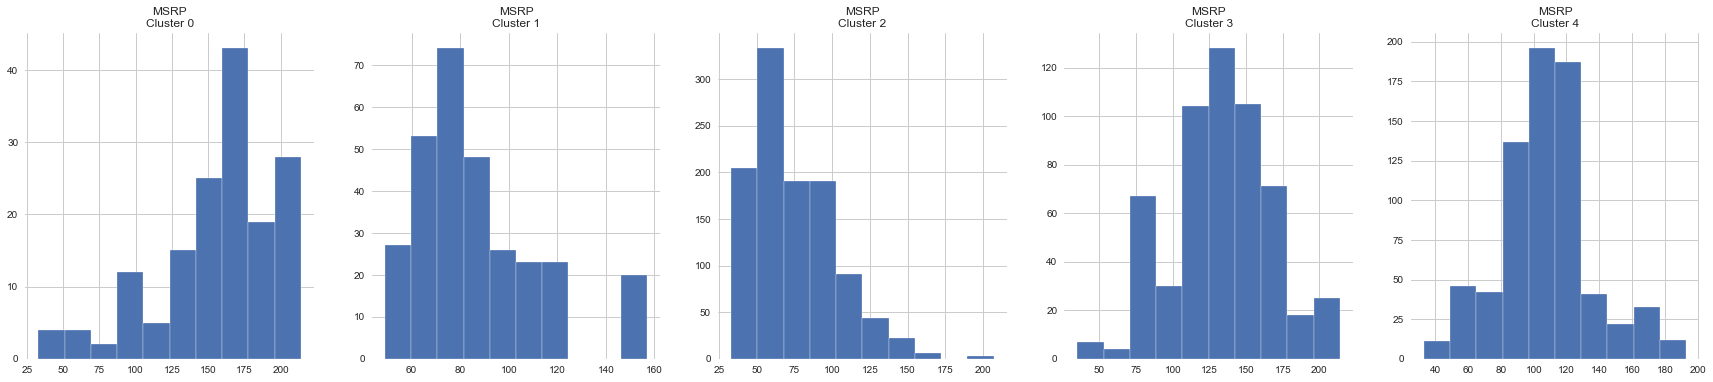

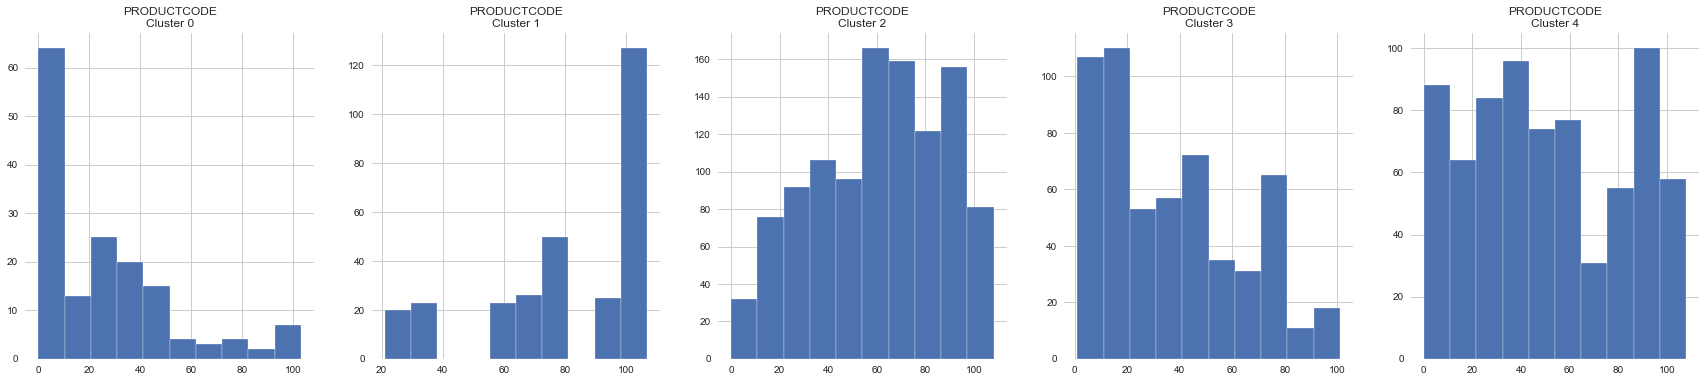

In [56]:
for i in sales_df.columns[:8]:
    plt.figure(figsize=(30,6))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = sale_df_std_cluster[sale_df_std_cluster['cluster']==j]
        cluster[i].hist()
        plt.title(f'{i}\nCluster {j}')
plt.show()

Con el fin de visualizar y obtener una mejor representación de los datos seleccionemos las variables más relevantes basándonos en la teroría de la **Análisis de Componentes Principales**.

### **Análisis de Componentes Principales (PCA)**

El análisis de componentes principales (PCA por sus siglas en inglés) es una **técnica estadística que se utiliza para reducir la dimensionalidad de un conjunto de datos**. El PCA busca encontrar una combinación lineal de las variables originales que capture la mayor cantidad posible de la varianza en los datos. Esta combinación se conoce como componente principal, y suele representar una dirección en el espacio de los datos que maximiza la varianza.

El análisis de componentes principales (PCA) puede ser útil en la clusterización ya que puede ayudar a simplificar los datos y a eliminar ruido y la multicolinealidad. La multicolinealidad se refiere a la presencia de correlaciones altas entre diferentes variables en un conjunto de datos. Esto puede ser un problema en la clusterización ya que puede afectar negativamente la calidad de los clusters generados.

El PCA puede ayudar a solucionar este problema al encontrar una combinación lineal de las variables originales que capture la mayor cantidad posible de la varianza en los datos. Esta combinación lineal se conoce como componente principal, y suele representar una dirección en el espacio de los datos que maximiza la varianza. Al utilizar esta combinación lineal en lugar de las variables originales en la clusterización, es posible obtener clusters más significativos y de mejor calidad.

Además, el PCA también puede ayudar a visualizar los datos en dos o tres dimensiones, lo que puede ser útil para comprender mejor la estructura subyacente de los datos y para evaluar la calidad de los clusters generados.

Realizaremos Analisis de Componentes Principales sobre los valores escalados con ``StandardScaler()``. En teoría es factible realizar K-means sobre los datos escalados y sobre los datos que son componentes principales, pero sería muy costoso aplicar K-Means sobre los dtos originales. Además, se puede sacar las componentes principales antes de escalar y aplicar el K-Means.

In [57]:
# Reducción de los datos originales a 3 dimensiones usando PCA para visualizar los clusters

pca_3d = PCA(n_components=3)
principal_component_3d = pca_3d.fit_transform(sales_df_std_scaled)
principal_component_3d

array([[-0.4862871 , -1.16743851,  0.95324972],
       [-0.784588  , -1.0047585 ,  1.41013336],
       [ 1.4315035 ,  0.14848503,  0.2633224 ],
       ...,
       [ 0.38990068,  4.16030124, -0.18492816],
       [-2.78890844,  2.40735106,  1.54637314],
       [-0.70548678,  3.29545819, -0.52117334]])

In [58]:
# Convertimos en un dataframe
pca_df_3d = pd.DataFrame(data=principal_component_3d, columns=['pca1','pca2','pca3'])
pca_df_3d.head(2)

,pca1,pca2,pca3
0,-0.486287,-1.167439,0.953250
1,-0.784588,-1.004758,1.410133


Ahora concatenemos el dataframe ``pca_df`` con el array de ``labels`` (prediccion del clustering) transformado a un frame con renombrado a ``cluster``.

In [59]:
pca_df_3d = pd.concat([pca_df_3d,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df_3d.head(2)

,pca1,pca2,pca3,cluster
0,-0.486287,-1.167439,0.953250,2
1,-0.784588,-1.004758,1.410133,2


Graficamos la disperción por cada uno de los clusters.

In [60]:
fig = px.scatter_3d(pca_df_3d, x='pca1',y='pca2',z='pca3',color='cluster',symbol='cluster',size_max=18,opacity=0.7)
fig.update_layout(
    margin=dict(l=0,r=0,b=0,t=0),
    title={
                'text': 'Gráfica de los clusters usando PCA-3D',
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'font_size': 22
                }
            )

In [61]:
pca_2d = PCA(n_components=2)
principal_component_2d = pca_2d.fit_transform(sales_df_std_scaled)
principal_component_2d

array([[-0.48619268, -1.24225862],
       [-0.78438963, -1.10647016],
       [ 1.43165975,  0.05214175],
       ...,
       [ 0.3896254 ,  4.13927507],
       [-2.78886049,  2.37707859],
       [-0.70557761,  3.33709085]])

In [62]:
pca_df_2d = pd.DataFrame(data=principal_component_2d, columns=['pca1','pca2'])
pca_df_2d.head(2)

,pca1,pca2
0,-0.486193,-1.242259
1,-0.784390,-1.106470


In [63]:
pca_df_2d = pd.concat([pca_df_2d, pd.DataFrame({'cluster':labels})], axis=1)
pca_df_2d.head(2)

,pca1,pca2,cluster
0,-0.486193,-1.242259,2
1,-0.784390,-1.106470,2


In [64]:
# Visualización de los clusters en una gráfica a través de sus componentes PCA-2D
fig = px.scatter(pca_df_2d, x='pca1',y='pca2',color='cluster',symbol='cluster',size_max=18,opacity=0.7)
fig.update_layout(
    margin=dict(l=0,r=0,b=0,t=0),
    title={
                'text': 'Gráfica de los clusters usando PCA-2D',
                'y':0.97,
                'x':0.35,
                'xanchor': 'right',
                'yanchor': 'top',
                'font_size': 20
                }
            )

## **Autoencoders para reduccion de dimensión | Redes Neuronales**

Los autoencoders tienen una estructura similar a la de otras redes neuronales, con capas de entrada, ocultas y de salida. La capa de entrada es donde se alimentan los datos de entrada a la red, mientras que la capa de salida es donde se producen las predicciones o resultados de la red.


Los autoencoders se pueden utilizar para la clusterización, ya que pueden aprender a representar los datos de entrada de manera compacta y densa, lo que permite agrupar fácilmente los datos en diferentes clusters.

La idea es que los autoencoders aprendan a codificar la información de entrada en una representación más pequeña y densa en la capa oculta, y que esta representación tenga una alta correlación con ciertas características o rasgos de los datos de entrada. Si se utiliza la representación comprimida de la capa oculta como entrada para otro algoritmo de clustering, como k-means o DBSCAN, se pueden formar clusters basados ​​en estas características o rasgos aprendidos por el autoencoder.

Los autoencoders también se pueden utilizar para inicializar otros algoritmos de clustering y mejorar su rendimiento. Ayuda en la reducción de dimensionalidad, el aprendizaje no supervisado y la generación de imágenes o texto. Por ejemplo, se pueden utilizar para inicializar los centroides en el algoritmo k-means, lo que puede mejorar la velocidad y la precisión del proceso de clustering.

En general, los autoencoders pueden ser una herramienta útil en la clusterización ya que pueden aprender a representar los datos de manera compacta y densa y facilitar la identificación de patrones y características relevantes en los datos.

El procedimiento consistirá en codificar la información (datos) del dataset cuyos resultados se usanrán para aplicar el algoritmo de K-Means despues de saber el numero optimo de clusters (``k``).
- Usaremos una arquitectura con dos redes neuronales; el codificador y descodificador.
- Usaremos el inicilizador [Glorot Uniform initializer](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform) para obtener una convergencia rápida ya que ayuda a que los pesos sean cercanos a cero de una forma más positiva que una distribucion normal o uniforme.

In [65]:
from keras.optimizers import SGD

# Arquitectura del encoder y decoder

# Encoder
input_df = Input(shape=(37,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

# Decoder
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

# Arquitectura del Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder - Utilizando para reducir la dimensión del datatset
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

Nuestra salida es igual que nuestra entrada en este caso porque queremos reconstruir el datasets original

In [66]:
# Verbose = 3: Para que muestre unicamente la información de la época actual, epochs total
autoencoder.fit(sales_df, sales_df, batch_size=128, epochs=500, verbose=3)


Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [67]:
autoencoder.save_weights('autoencoder_p1.h5')

In [68]:
pred = encoder.predict(sales_df_std_scaled)

89/89 [==============================] - 1s 10ms/step


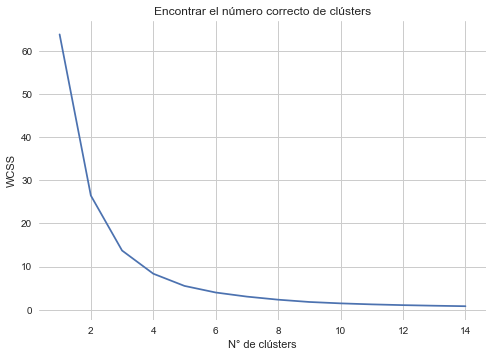

In [69]:
scores = []
range_values = range(1,15)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores.append(kmeans.inertia_)

plt.plot(range_values,scores,'x-')
plt.title('Encontrar el número correcto de clústers')
plt.xlabel('N° de clústers')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [70]:
from itertools import cycle

def plot_wscc(list_scalers, num_k_optimized):
    
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    
    # lista_y = cycle([5690.427, 5690.427, 11.68018*1000])
    lista_y = []
    color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for j in range(len(list_scalers)):

        scores = []

        for i in range(1,16):
            kmeans = KMeans(n_clusters=i)
            kmeans.fit(list_scalers[list(scalers.keys())[j]])
            scores.append(kmeans.inertia_) # la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano
            if i == num_k_optimized:
                lista_y.append(kmeans.inertia_)

        fig = plt.Figure(figsize = (12, 5))
        fig = px.line(
                    x=np.arange(1,16),
                    y=np.array(scores),
                    # color = next(color_list),
                    # color_discrete_sequence = px.colors.qualitative.G10,
                    height = 600,
                    markers=True,
                    labels={
                        'x': 'N° de Clusters',
                        'y': 'WCSS'
                    }
                    )
        color_font_line = next(color_cycle)
        fig.update_traces(line_color=color_font_line)
        # Configuración del diseño de elementos de la figura
        fig.update_layout(
            title={
                'text': f'Encontrar el número correcto de clusters con {list(scalers.keys())[j]} escaler',
                # 'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'font_size': 22,
                'font_color': color_font_line}
            )
        # Anotación
        fig.add_annotation(
                text="Número óptimo de clusters",
                x=num_k_optimized,
                y=lista_y[j],
                arrowhead=1,
                showarrow=True,
            )
        fig.show()

In [71]:
scalers = {
    'standard': sales_df_mm_scaled,
    'minmax': sales_df_mm_scaled,
    'robust': sales_df_robust_scaled
}

plot_wscc(scalers,3)

Podemos observar que el mejor numero de clusters, es decir el codo se da en k (número de clústers) igual a 3, por tanto, en las siguintes líneas realizaremos la implemnetación de nuestro algoritmo de KMeans con 3 clústers.

In [72]:
kmeans = KMeans(n_clusters=3)
# Realizamos el entrenamiento sobre los valores (pred) generados por el encoder
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_transform(sales_df_std_scaled)

In [73]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame(data={'cluster':labels})], axis=1)
df_cluster_dr.head(3)
# pd.concat([sales_df, pd.DataFrame(data={'cluster':labels})], axis=1)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,34,81.35,5,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,41,94.74,2,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [74]:
clusters_centers_scaled = kmeans.cluster_centers_
clusters_centers_not_scaled = std_scaler.inverse_transform(kmeans.cluster_centers_)

clusters_centers_scaled_df = pd.DataFrame(data=clusters_centers_scaled, columns=[sales_df.columns])
clusters_centers_not_scaled_df = pd.DataFrame(data=clusters_centers_not_scaled, columns=[sales_df.columns])

# clusters_centers_scaled_df
clusters_centers_not_scaled_df


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,1.404056e-02,0.028081,0.020281,0.031981,0.112324,0.021841,0.006240,0.048362,0.021841,0.029641,0.008580,0.028861,0.120125,0.018721,7.020281e-03,0.053822,0.339314,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170,-1.040834e-16,-8.326673e-16,1.0
1,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,1.083815e-02,0.023844,0.022399,0.033237,0.107659,0.021676,0.004335,0.031792,0.015173,0.030347,0.010116,0.027457,0.123555,0.022399,1.589595e-02,0.051301,0.364884,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584,-9.020562e-17,1.000000e+00,0.0
2,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,1.734723e-18,0.006369,0.038217,0.031847,0.133758,0.025478,0.012739,0.044586,0.019108,0.031847,0.006369,0.025478,0.108280,0.012739,-5.204170e-18,0.025478,0.407643,0.617834,0.121019,0.057325,-4.163336e-17,0.006369,0.044586,0.152866,1.000000e+00,-2.775558e-16,0.0


- **Cluster índice 0:**
  - El grupo de cientes que compran en promedio 37 articulos.
  - Suelen comprar productos de un precio alrededor de 95 dólares un precio aún altcomparando con el grupo de **hight rollers**.
  - Generan ventas en promedio de 4398 dólares por da, que son casi la mitad de las ventas que generan los del grupo **hight rollers** o clientes potenciales con mayor capacidad de adquisición.
- **Cluster índice 1:**
  - Este grupo representa a los clientes que realizan mayor cantidad centrada de pedidos o compras  (entorno a 47 pedidos).
  - Compran articulos en todos lo rangos de precios inclinándose hacia artículos de precios más altos de 99.8 dólares.
  - Corresponden a ventan totales más altas alrededor de 8293 dólares.
  - Son usuarios o clientes que compran productos con alta MSRP alrededor de 158 dólares.
  - En suma, podemos decir que este es el grupo de los usuarios **high rollers** los que están dispuestos a comprar nuestros productos de mayor costo, están en las posibilidades y tienen recurrencia todo el año.
- **Cluster índice 2:**
  - Este grupo representa a los clientes que compran artículos en cantidades bajas alrededor de 30.
  - Suelen comprar artículos de muy bajo precio alrededor de 68.
  - Grupo de clientes que general menor cantidad en ventas alrededor de 2061 dólares por día, el más bajo en comparación con los demás grupos de clientes.
  - Son extremadamente activos durante durante la temporada Navideña.
  - Compran productos con el menor MSRP que esta alrededor de 77.
  - Este es el grupo que compra menos productos y por tanto genera menos ventas. Sin embargo, el equipo de Marketing podría ofrecer ofertas como los de Back Friday o descuentos porque su motivación parece ser el aprovechar los precios mas bajos, gastar poco dinero.

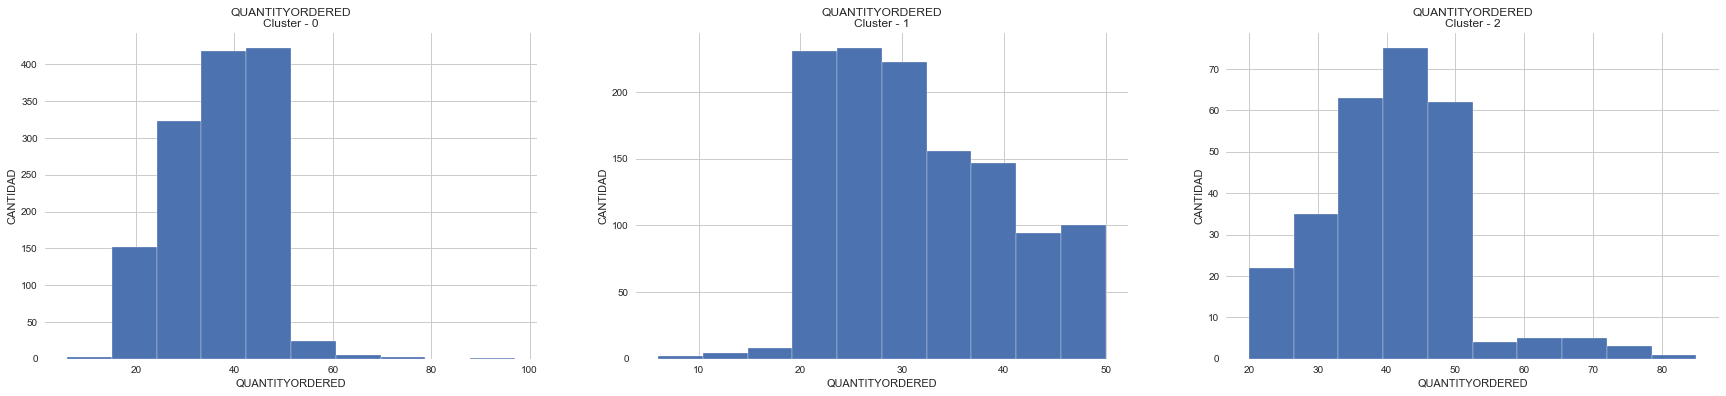

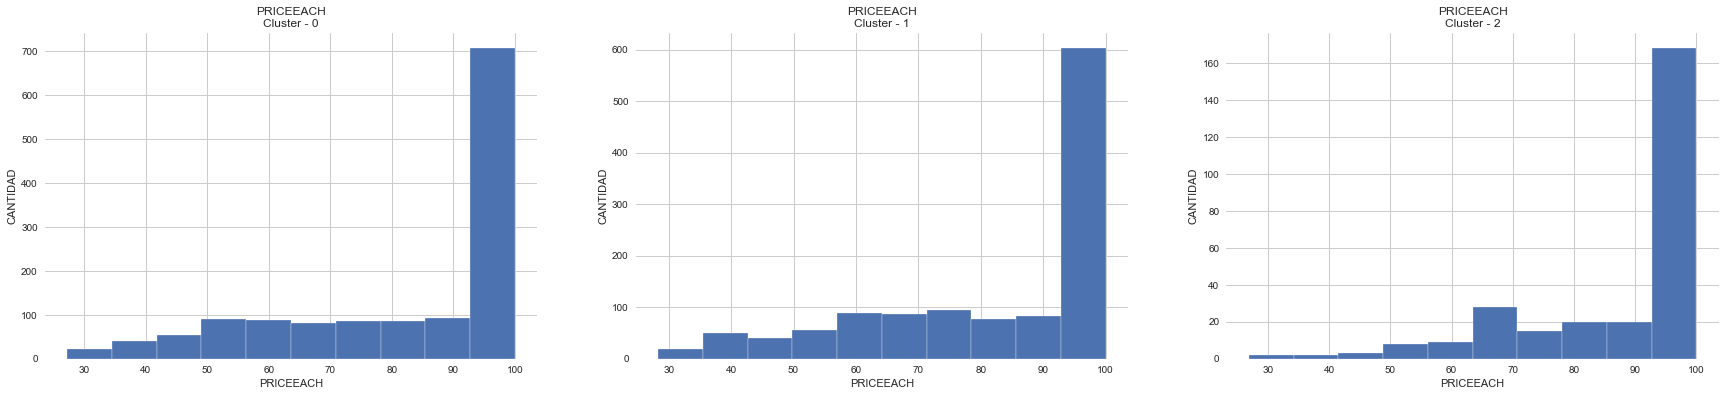

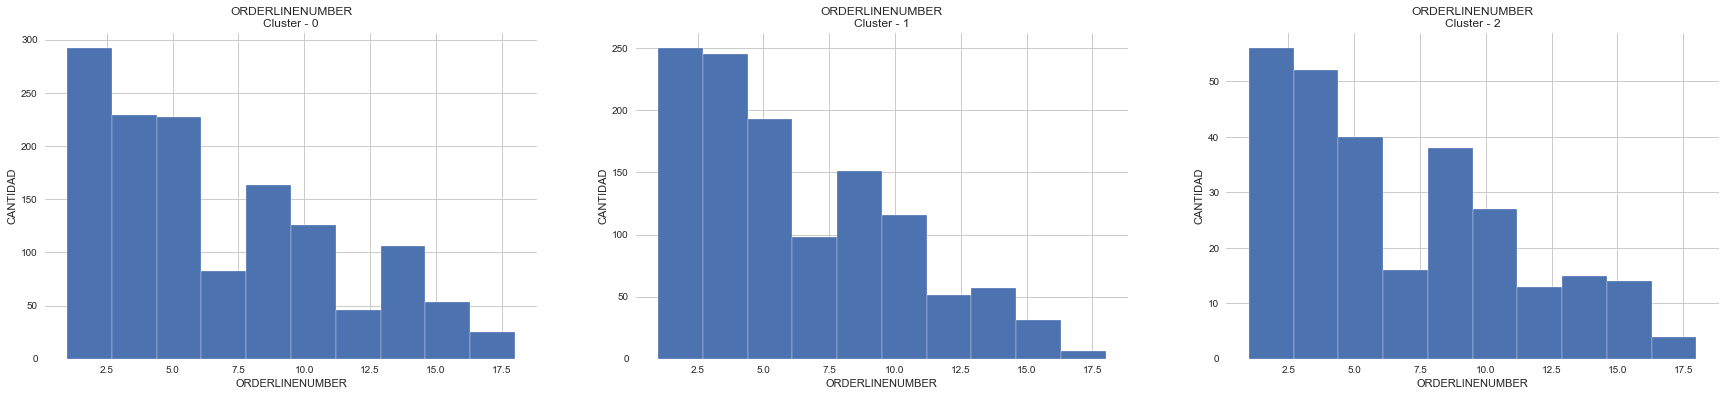

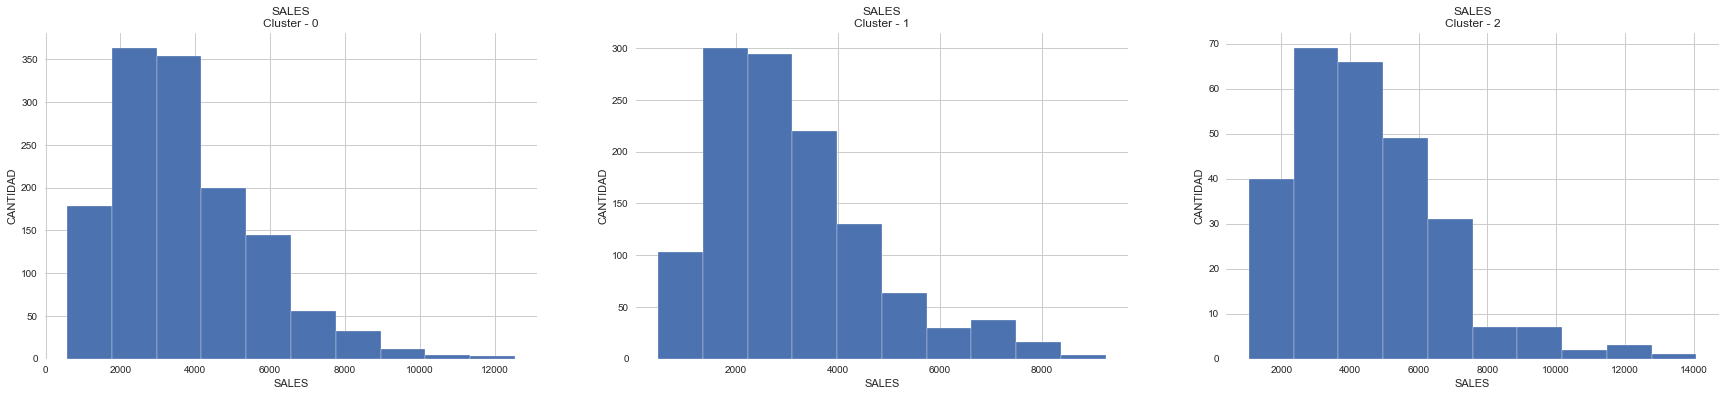

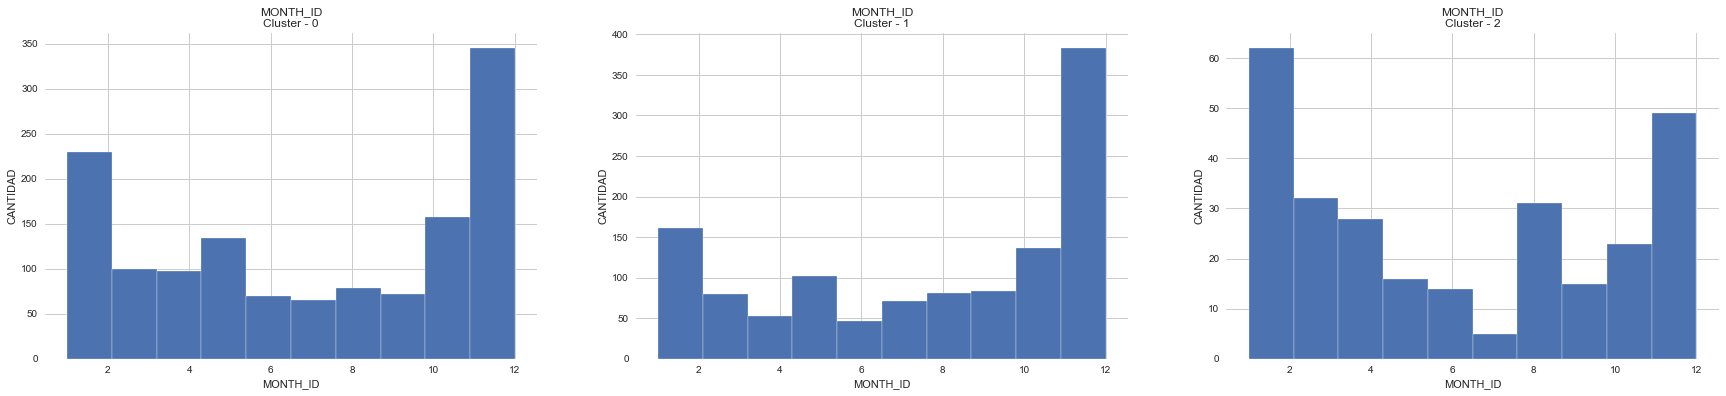

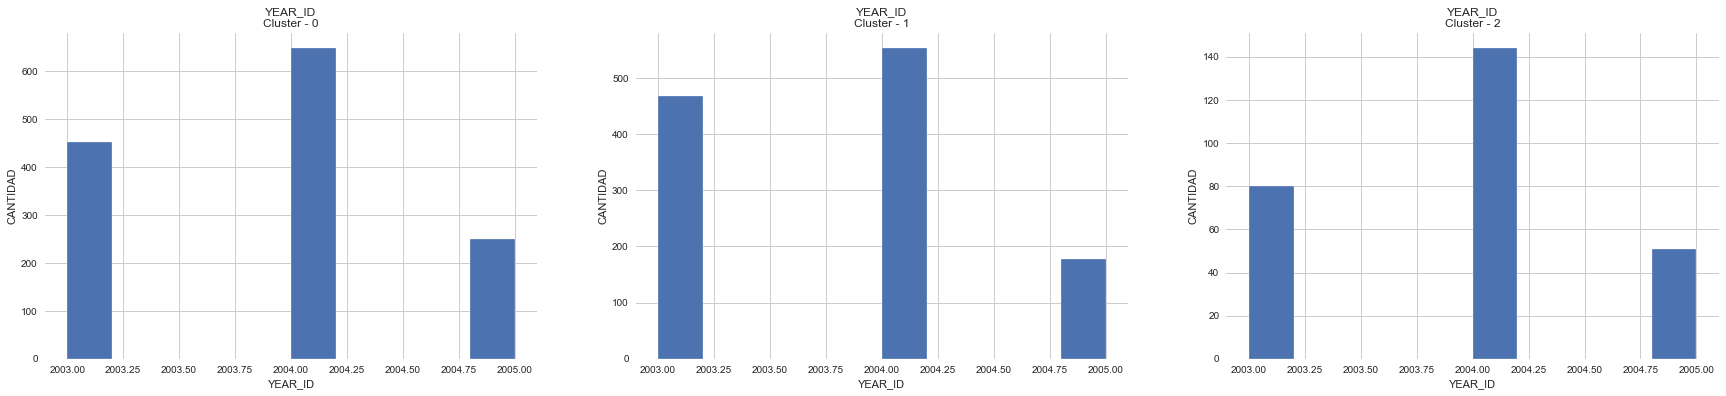

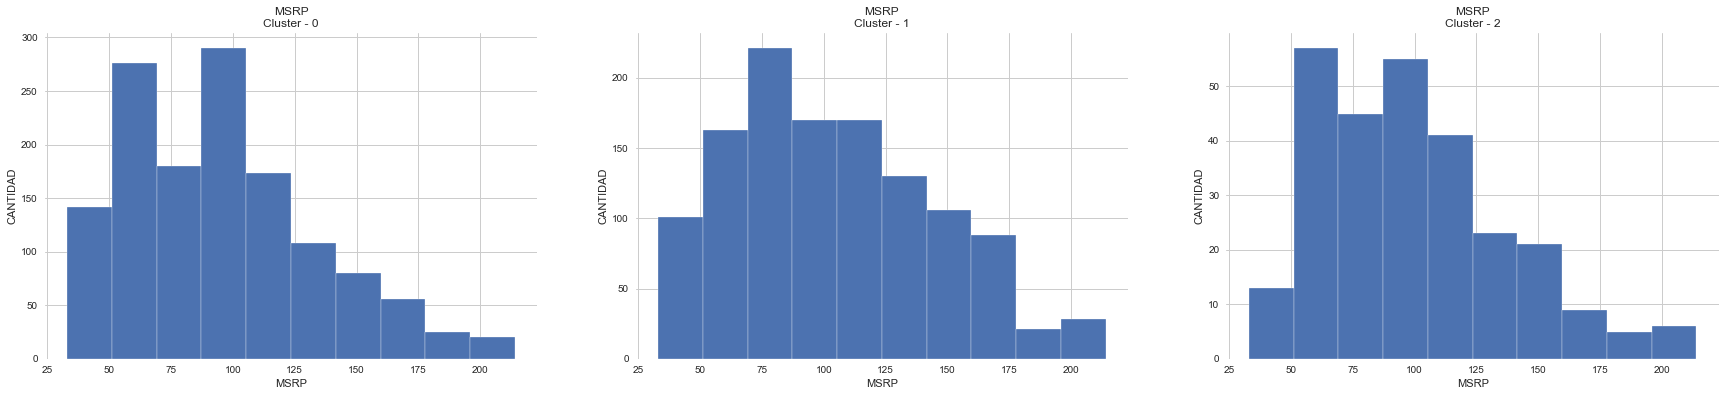

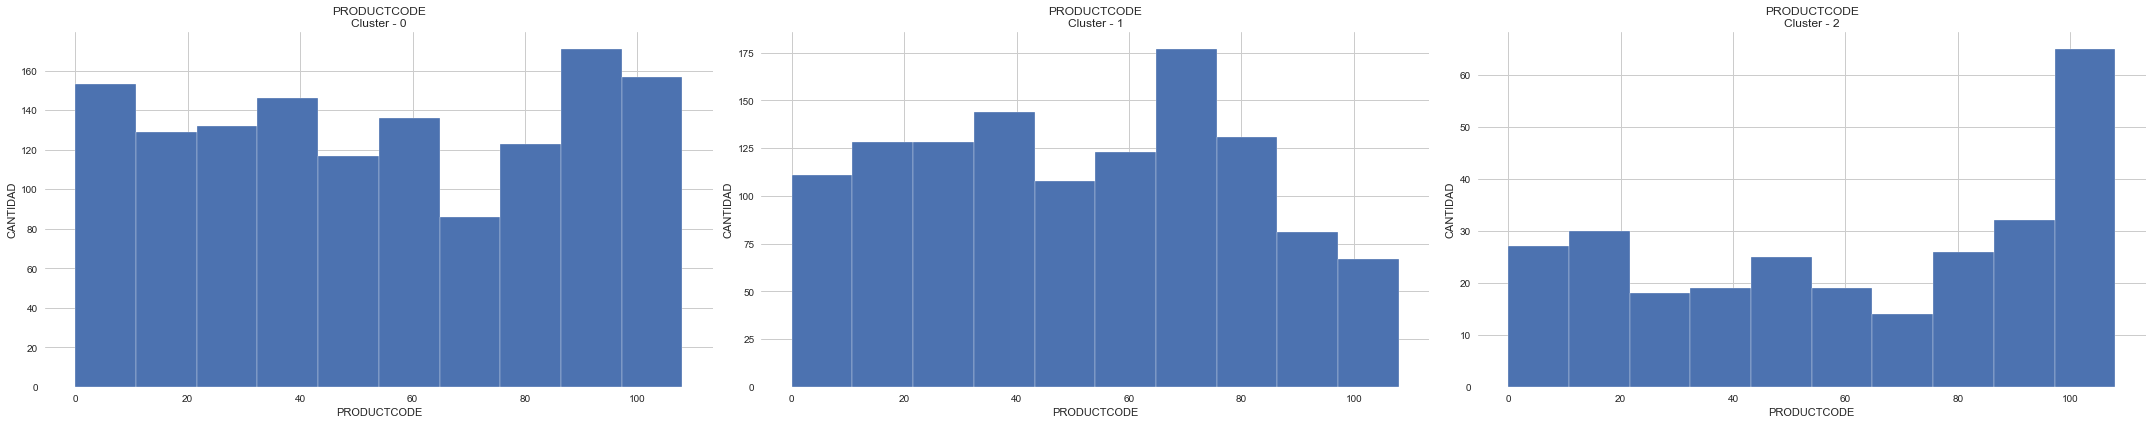

In [75]:
for i in sales_df.columns[:8]:
    plt.figure(figsize=(30,6))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = df_cluster_dr[df_cluster_dr['cluster']==j]
        cluster[i].hist()
        plt.title(f'{i}\nCluster - {j}')
        plt.xlabel(f'{i}')
        plt.ylabel('CANTIDAD')
plt.tight_layout()
plt.show()

Los clientes del cluster 0 piden items entre 30 y 55, en promedio alrededor de 45 items, del cluster 1 lo hacen entre 20 y 50 con una probabilidad alta uniforme con pequeña tendencia positiva, los del cluster tienen mayor probabilidad de comprar 30 items con un rango de 20 a 55 artículos.

Los precios unitarios (``PRICEEACH``) de los productos adquiridos en los tres segmentos de clientes tienen una tendencia a adquirir productos con un alto precio unitario con mayor frecuencia en todos los segementos.

En cuanto a las ventas que generan (``SALES``) se puede decir que el grupo de los clientes con poder adquisitivo mayor, medio y menor,  siguen una distribucion normal. Sin embargo, los dos primeros grupos generan altas cantidades en ventas siendo del grupo con poder adquisiivo medio con alta frecuencia.

Los pedidos tienen mayor frecuencia en los meses noviembre, diciembre, enero y frebrero por motivos del BlackFriday, Navidad, Año Nuevo y ene general vacaciones en los tres segmentos de clientes, sin embargo es posible encontrar clientes que compran los artículos con una frecuencia considerable durante los meses de Abril y Mayo por tanto se debe preveer la disponibilidad de productos y ofertas preparadas para aprovechar.

En resumen podemos concluir que:

1. Clúster 0: este grupo representa a los clientes que compran artículos en gran cantidad (47), por lo general compran artículos con precios altos (99). Aportan más ventas que otros grupos. En su mayoría están activos durante todo el año. Suelen comprar productos correspondientes al código de producto 10-90. Compran productos con un alto mrsp (158).
2. Clúster 1: este grupo representa a los clientes que compran artículos en cantidad promedio (37) y que compran tienden a comprar artículos de precio alto (95). Aportan un promedio de ventas (4398) y están activos todo el año, son los mayores compradores de los productos correspondientes a los códigos de producto 0-10 y 90-100, además prefieren comprar productos con un PVPR elevado (115).
3. Clúster 2: este grupo representa a los clientes que compran artículos en pequeñas cantidades (30), tienden a comprar artículos de bajo precio (69). Corresponden a la venta total más baja (2061) y están activos durante todo el año. Son los mayores compradores de productos correspondientes a los códigos de producto 0-20 y 100-110 y luego compran productos con PVPR bajo (77).

**``Reducción de dimensiones a tres variables usando ACP para visualizar los clústeres``**

In [76]:
pca_3d = PCA(n_components = 3)
prin_comp_3d = pca_3d.fit_transform(sales_df_std_scaled)
pca_df_3d = pd.DataFrame(data = prin_comp_3d, columns = ['pca1', 'pca2', 'pca3'])
pca_df_3d.head()

,pca1,pca2,pca3
0,-0.486279,-1.304628,0.966509
1,-0.784815,-1.112391,1.421278
2,1.431371,0.080001,0.316836
3,1.288448,-0.268783,-0.582122
4,1.975957,-0.184302,-1.065785


In [77]:
pca_df_3d = pd.concat([pca_df_3d, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df_3d.head()

,pca1,pca2,pca3,cluster
0,-0.486279,-1.304628,0.966509,0
1,-0.784815,-1.112391,1.421278,0
2,1.431371,0.080001,0.316836,0
3,1.288448,-0.268783,-0.582122,0
4,1.975957,-0.184302,-1.065785,0


In [78]:
fig = px.scatter_3d(pca_df_3d, x='pca1',y='pca2',z='pca3',color='cluster',symbol='cluster',size_max=18,opacity=0.7)
fig.update_layout(
    margin=dict(l=0,r=0,b=0,t=0),
    title={
                'text': 'Gráfica de los clusters usando PCA-3D',
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'font_size': 22
                }
            )

*Elaborado por [Roy Quillca](https://www.linkedin.com/in/royquillca/)*

Algunas lineas de código para gestionar los recursos adicionales.

In [79]:
# Reeescalado de imagenes
# import cv2
# import numpy as np

# img = cv2.imread('./img/within_cluster_sum_of_squares.png')
# res = cv2.resize(img, dsize=(700, 340), interpolation=cv2.INTER_CUBIC)
# cv2.imwrite('./img/fig_wcss.png',res)

In [80]:
# sns.set_style('whitegrid')

# from itertools import cycle
# plt.style.use('seaborn')
# color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# # Funcion para graficar 
# def plot_wscc(list_scalers):
#     for j in range(len(list_scalers)):
#         scores = []
#         for i in range(1,21):
#             kmeans = KMeans(n_clusters=i)
#             kmeans.fit(list_scalers[list(scalers.keys())[j]])
#             scores.append(kmeans.inertia_) # la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano

#         plt.plot(scores, marker='o', linestyle='solid', color=next(color_cycle))
#         plt.title(f'Encontrar el número correcto de clusters con {list(scalers.keys())[j]} escaler')
#         plt.xlabel('N° de Clusters')
#         plt.ylabel('WCSS')
#         plt.show()
# # 
# plot_wscc(scalers)